> Muhammad Mustafa 25850354

> Zunaira Zunaira  10931968

>Zalfa Mohayyudin 12749927

## **Exercise 5.1**

Temperature data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 1. Load the data
df = pd.read_csv("temperature_data_processed.csv")

In [4]:
# 2. Parse the 'date' column into year, month, and day
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')

# 3. Add separate columns for year, month, and day
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# 4. Remove rows with missing temperature values (-999)
df = df[df['temp'] != -999]

# Optional: Reset the index after filtering
df.reset_index(drop=True, inplace=True)

# Display the cleaned dataframe
print(df.head())


   stationid  temp       date  time  year  month  day
0          3  -5.6 1891-01-01     7  1891      1    1
1          3  -0.7 1891-01-01    14  1891      1    1
2          3  -4.0 1891-01-01    21  1891      1    1
3          3  -5.2 1891-01-02     7  1891      1    2
4          3  -1.0 1891-01-02    14  1891      1    2


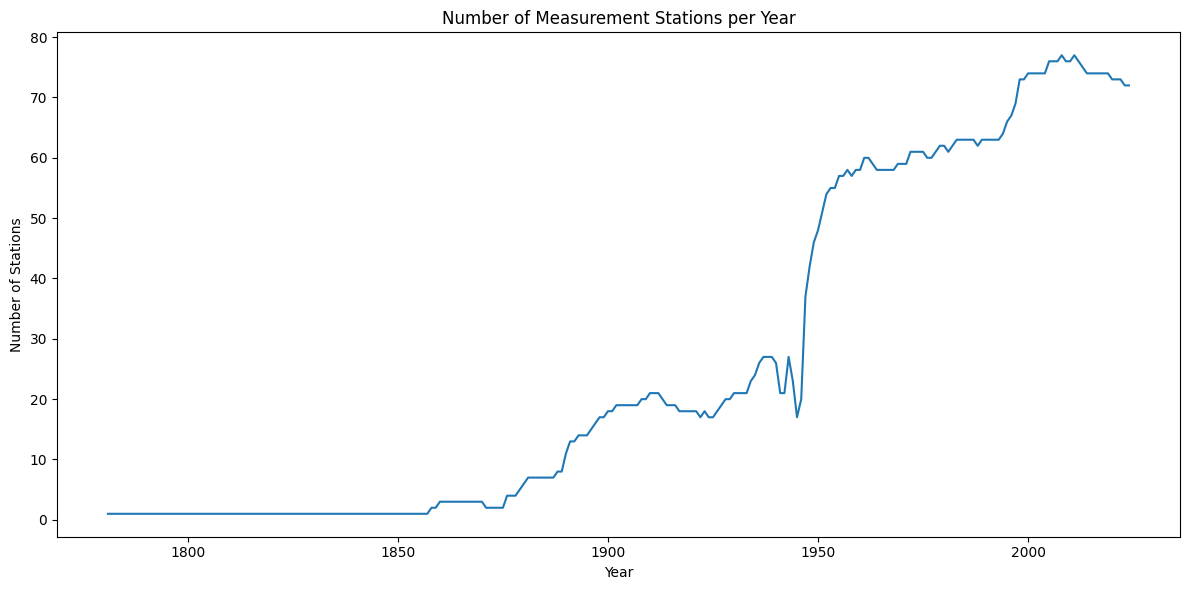

In [5]:
# Group by year and count unique station IDs
stations_per_year = df.groupby('year')['stationid'].nunique()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(stations_per_year.index, stations_per_year.values,)
plt.title("Number of Measurement Stations per Year")
plt.xlabel("Year")
plt.ylabel("Number of Stations")
plt.tight_layout()
plt.show()


In [6]:
# Get stations active in 1960
stations_1960 = set(df[df['year'] == 1960]['stationid'].unique())

# Get stations active in 2020
stations_2020 = set(df[df['year'] == 2020]['stationid'].unique())

# Find intersection: stations active in both years
reference_stations = stations_1960.intersection(stations_2020)

# Optional: Convert to list and sort
reference_stations = sorted(reference_stations)

print(f"Number of reference stations: {len(reference_stations)}")
print("Reference Station IDs:", reference_stations)


Number of reference stations: 53
Reference Station IDs: [np.int64(164), np.int64(183), np.int64(232), np.int64(282), np.int64(403), np.int64(433), np.int64(691), np.int64(722), np.int64(880), np.int64(891), np.int64(1048), np.int64(1270), np.int64(1346), np.int64(1358), np.int64(1420), np.int64(1468), np.int64(1612), np.int64(1639), np.int64(1684), np.int64(1975), np.int64(2014), np.int64(2115), np.int64(2261), np.int64(2290), np.int64(2483), np.int64(2559), np.int64(2667), np.int64(2812), np.int64(3015), np.int64(3032), np.int64(3126), np.int64(3196), np.int64(3631), np.int64(3668), np.int64(3730), np.int64(3761), np.int64(3987), np.int64(4104), np.int64(4177), np.int64(4271), np.int64(4336), np.int64(4466), np.int64(4625), np.int64(4887), np.int64(4911), np.int64(4931), np.int64(5100), np.int64(5371), np.int64(5397), np.int64(5516), np.int64(5705), np.int64(5792), np.int64(5906)]


In [7]:
# Filter the data
filtered_df = df[
    (df['stationid'].isin(reference_stations)) &  # reference stations
    (df['year'] >= 1960) & (df['year'] <= 2020) &  # year range
    (df['time'].isin([12, 14]))  # time is 12 or 14
]

# Optional: Reset index
filtered_df.reset_index(drop=True, inplace=True)

# Check the result
print(filtered_df.head())
print(f"Filtered dataset shape: {filtered_df.shape}")


   stationid  temp       date  time  year  month  day
0        164   6.6 1960-01-01    14  1960      1    1
1        164   8.4 1960-01-02    14  1960      1    2
2        164   5.3 1960-01-03    14  1960      1    3
3        164   5.0 1960-01-04    14  1960      1    4
4        164   5.9 1960-01-05    14  1960      1    5
Filtered dataset shape: (1160070, 7)


In [8]:
# Group by year and time, then count the number of measurements
measurements_per_year_time = filtered_df.groupby(['date', 'time']).size().reset_index(name='count')

# Pivot the table for better readability: years as rows, time (12, 14) as columns
pivot_table = measurements_per_year_time.pivot(index='date', columns='time', values='count').fillna(0)

# Optional: Rename columns for clarity
pivot_table.columns = [f"time_{col}" for col in pivot_table.columns]

# Display the result
print(pivot_table.head(10))  # Show the first 10 years as an example

            time_12  time_14
date                        
1960-01-01      0.0     52.0
1960-01-02      0.0     52.0
1960-01-03      0.0     52.0
1960-01-04      1.0     52.0
1960-01-05      1.0     52.0
1960-01-06      1.0     52.0
1960-01-07      1.0     52.0
1960-01-08      1.0     52.0
1960-01-09      1.0     52.0
1960-01-10      0.0     52.0


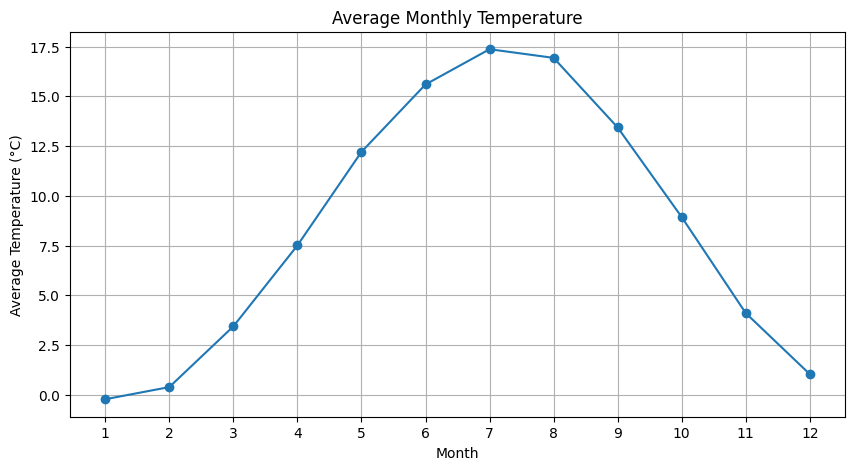

In [9]:
monthly_avg = df.groupby('month')['temp'].mean()

plt.figure(figsize=(10, 5))
monthly_avg.plot(marker='o')
plt.title('Average Monthly Temperature')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.grid(True)
plt.xticks(range(1, 13))
plt.show()


In [10]:
# Combined data for all months
annual_mean_temp = filtered_df.groupby("year")["temp"].mean().reset_index()

# Data for a specific month (e.g., June = 6)
june_data = filtered_df[filtered_df["month"] == 6]
june_mean_temp = june_data.groupby("year")["temp"].mean().reset_index()


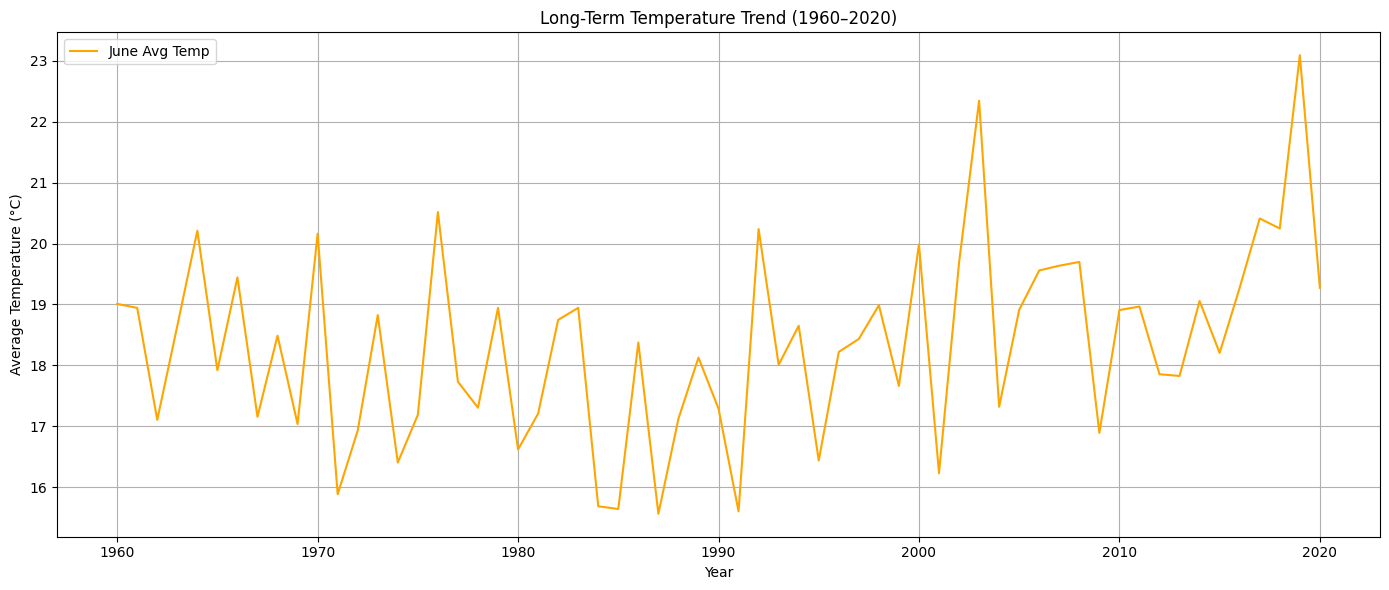

In [11]:
plt.figure(figsize=(14, 6))
# Plot trend for June only
plt.plot(june_mean_temp["year"], june_mean_temp["temp"], label="June Avg Temp", color="orange")

plt.title("Long-Term Temperature Trend (1960–2020)")
plt.xlabel("Year")
plt.ylabel("Average Temperature (°C)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
